In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r'DATA/student-performance/student-mat.csv',delimiter=';')
df2 = pd.read_csv(r'DATA/student-performance/student-por.csv',delimiter=';')
print(df1.shape)
print(df2.shape)


(395, 33)
(649, 33)


In [3]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
data=pd.concat([df1,df2], axis=0)
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
df3 = pd.merge(df1, df2, on=merge_columns)
data = data.drop_duplicates(subset=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'])
print(data.shape)

(662, 33)


In [6]:
data.to_csv(r'DATA/student-performance/students.csv')

In [7]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      662 non-null    object
 1   sex         662 non-null    object
 2   age         662 non-null    int64 
 3   address     662 non-null    object
 4   famsize     662 non-null    object
 5   Pstatus     662 non-null    object
 6   Medu        662 non-null    int64 
 7   Fedu        662 non-null    int64 
 8   Mjob        662 non-null    object
 9   Fjob        662 non-null    object
 10  reason      662 non-null    object
 11  guardian    662 non-null    object
 12  traveltime  662 non-null    int64 
 13  studytime   662 non-null    int64 
 14  failures    662 non-null    int64 
 15  schoolsup   662 non-null    object
 16  famsup      662 non-null    object
 17  paid        662 non-null    object
 18  activities  662 non-null    object
 19  nursery     662 non-null    object
 20  higher    

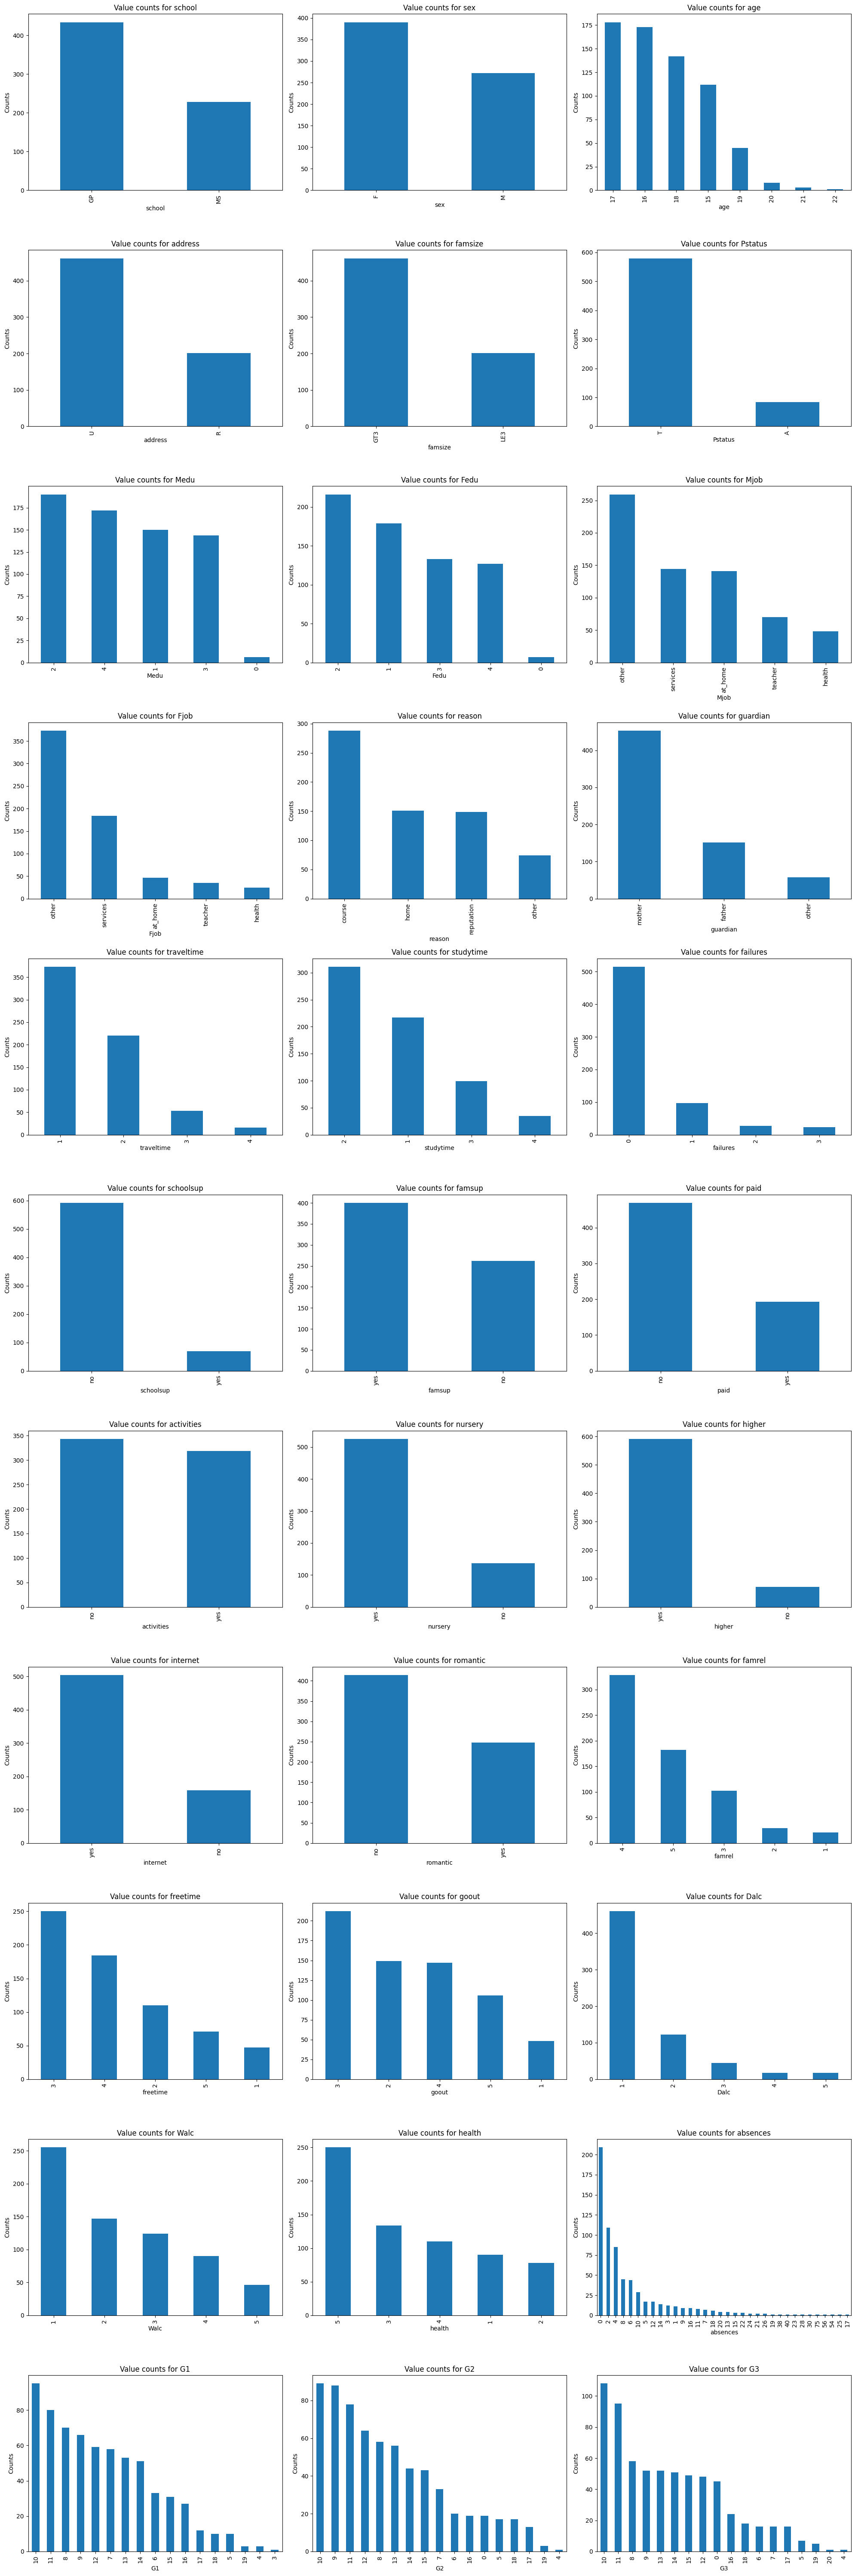

In [9]:
def plot_value_counts(df):
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(20, 60))  # Adjust the figsize as needed
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(df.columns):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Value counts for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Counts')

    # Hide any unused subplots if the number of columns is not exactly 33
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_value_counts(data)


In [10]:
data['school'] = data['school'].map({'GP': 0, 'MS': 1})
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['address'] = data['address'].map({'U': 0, 'R': 1})
data['famsize'] = data['famsize'].map({'LE3': 2, 'GT3': 4})
data['Pstatus'] = data['Pstatus'].map({'T': 1, 'A': 0})
data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['paid'] = data['paid'].map({'yes': 1, 'no': 0})
data['activities'] = data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] = data['nursery'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})
data['romantic'] = data['romantic'].map({'yes': 1, 'no': 0})


columns_to_encode = ['Mjob', 'Fjob', 'reason','guardian']

data= pd.get_dummies(data, columns=columns_to_encode)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             662 non-null    int64
 1   sex                662 non-null    int64
 2   age                662 non-null    int64
 3   address            662 non-null    int64
 4   famsize            662 non-null    int64
 5   Pstatus            662 non-null    int64
 6   Medu               662 non-null    int64
 7   Fedu               662 non-null    int64
 8   traveltime         662 non-null    int64
 9   studytime          662 non-null    int64
 10  failures           662 non-null    int64
 11  schoolsup          662 non-null    int64
 12  famsup             662 non-null    int64
 13  paid               662 non-null    int64
 14  activities         662 non-null    int64
 15  nursery            662 non-null    int64
 16  higher             662 non-null    int64
 17  internet        

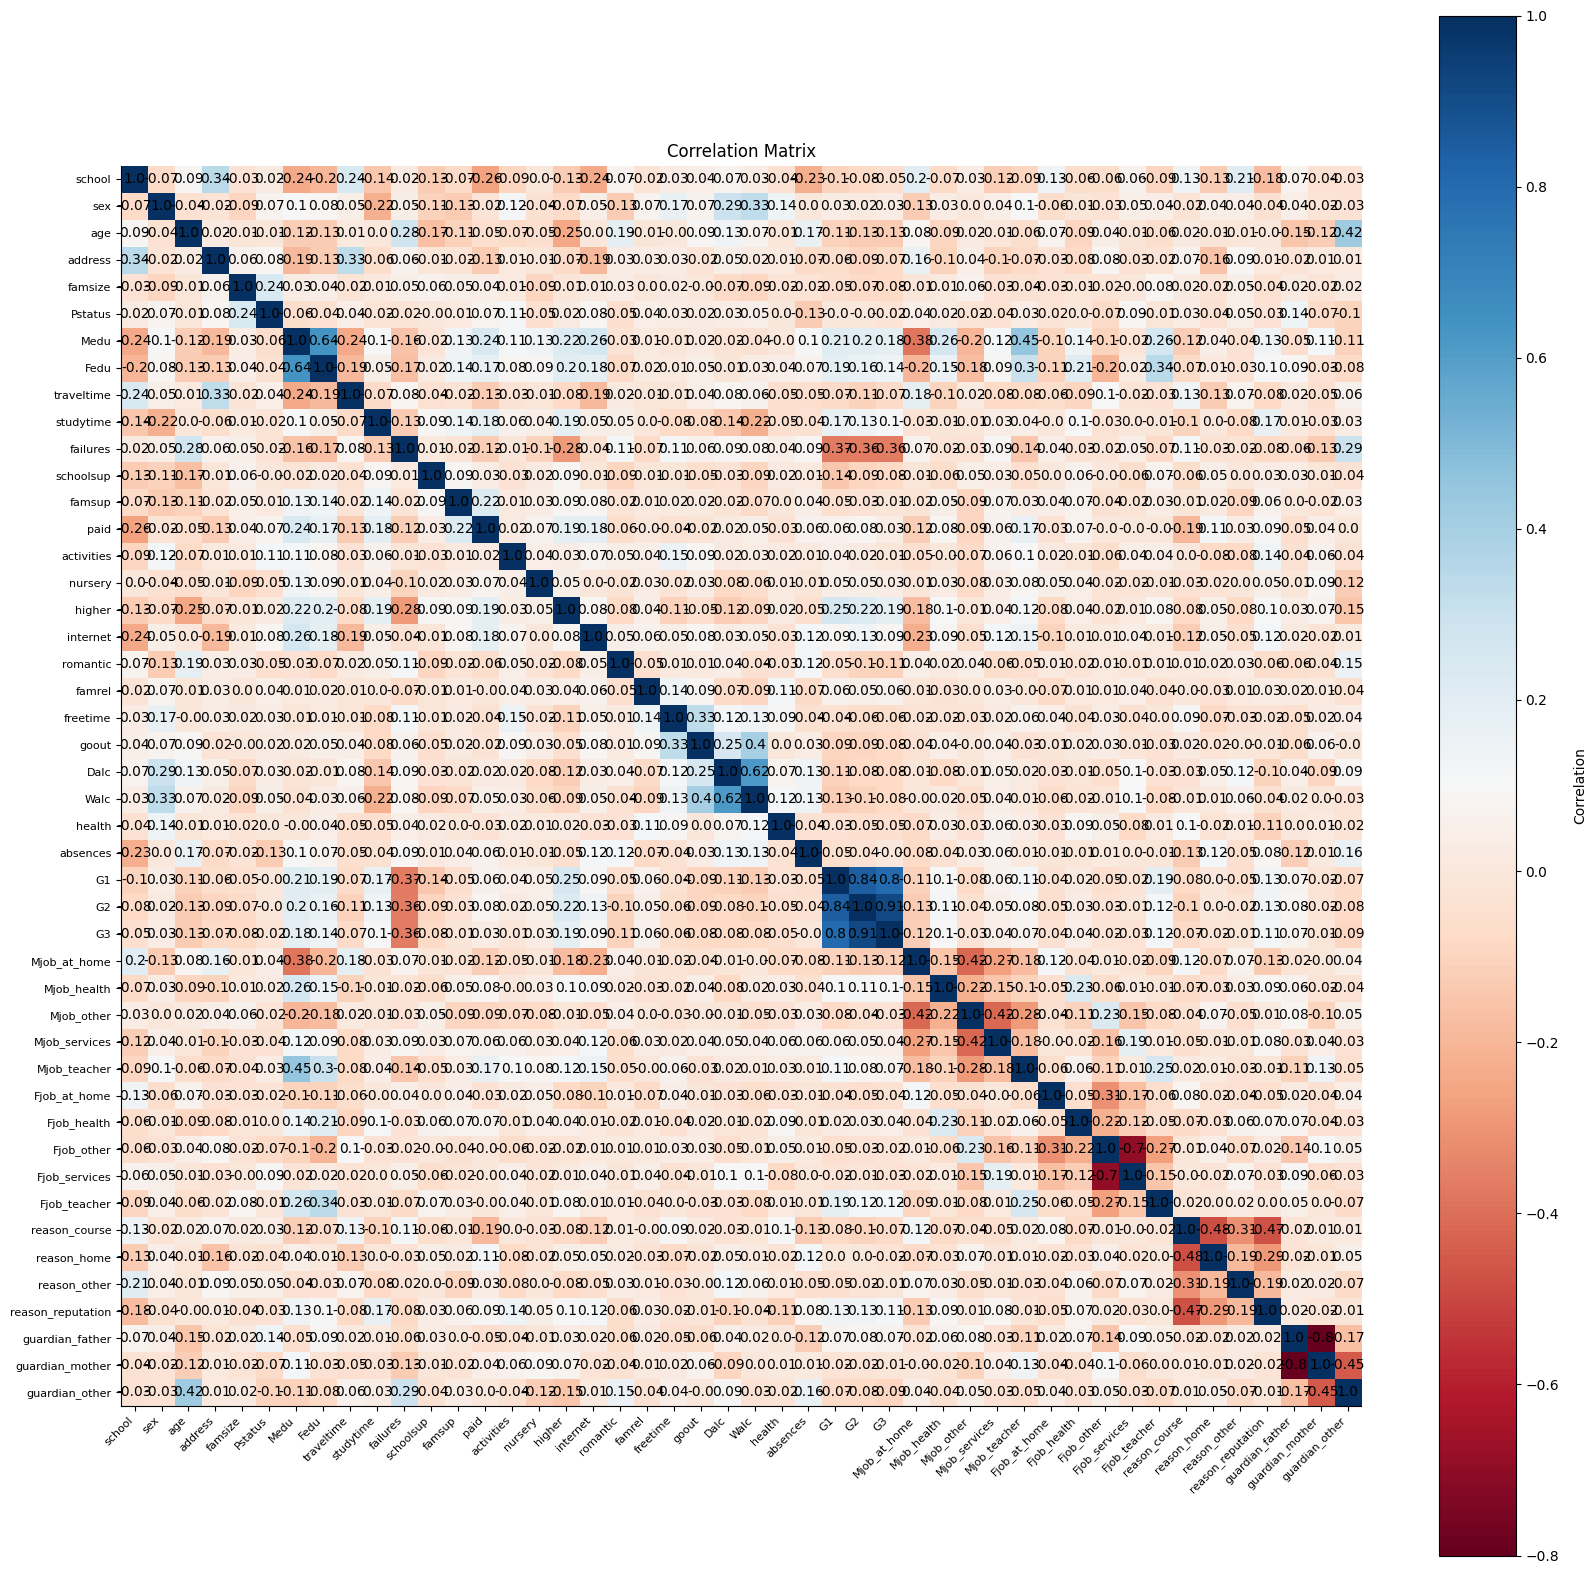

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
corr_matrix = data.corr().round(2)

heatmap = ax.imshow(corr_matrix, cmap='RdBu')


ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr_matrix.columns, fontsize=8)

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation', rotation=90, labelpad=10)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, str(corr_matrix.iloc[i, j]), ha='center', va='center', color='black')
ax.set_title('Correlation Matrix')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [28]:
X=data.drop(['G1','G2','G3'],axis=1)
# X=data.drop(['G1','G3'],axis=1)
y=data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 

In [26]:
X=data.drop(['G3','G1'],axis=1)
y=data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        reg = DecisionTreeRegressor(max_depth= 3, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
        cv_scores = cross_val_score(reg, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_reg = DecisionTreeRegressor(max_depth= 3, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
final_reg.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_reg.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_reg.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))


Selected feature: G2, Cross-validated score: -3.6040
Selected feature: absences, Cross-validated score: -3.4311
Final selected features: ['G2', 'absences']
Test set R^2 score: 0.8960
0.8960175262985269
1.784567094309491


In [28]:
X=data.drop(['G3','G1'],axis=1)
y=data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        LR = LinearRegression()
        cv_scores = cross_val_score(LR, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_LR = LinearRegression()
final_LR.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_LR.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_LR.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))


Selected feature: G2, Cross-validated score: -3.0110
Selected feature: paid, Cross-validated score: -2.9792
Selected feature: failures, Cross-validated score: -2.9570
Selected feature: absences, Cross-validated score: -2.9337
Selected feature: activities, Cross-validated score: -2.9124
Selected feature: school, Cross-validated score: -2.8992
Selected feature: sex, Cross-validated score: -2.8925
Selected feature: famsize, Cross-validated score: -2.8867
Selected feature: reason_course, Cross-validated score: -2.8828
Selected feature: Fjob_services, Cross-validated score: -2.8801
Selected feature: guardian_mother, Cross-validated score: -2.8786
Final selected features: ['G2', 'paid', 'failures', 'absences', 'activities', 'school', 'sex', 'famsize', 'reason_course', 'Fjob_services', 'guardian_mother']
Test set R^2 score: 0.8751
0.8751106942497238
2.1433741431556537


In [29]:
X_train_selected.columns

Index(['G2', 'paid', 'failures', 'absences', 'activities', 'school', 'sex',
       'famsize', 'reason_course', 'Fjob_services', 'guardian_mother'],
      dtype='object')

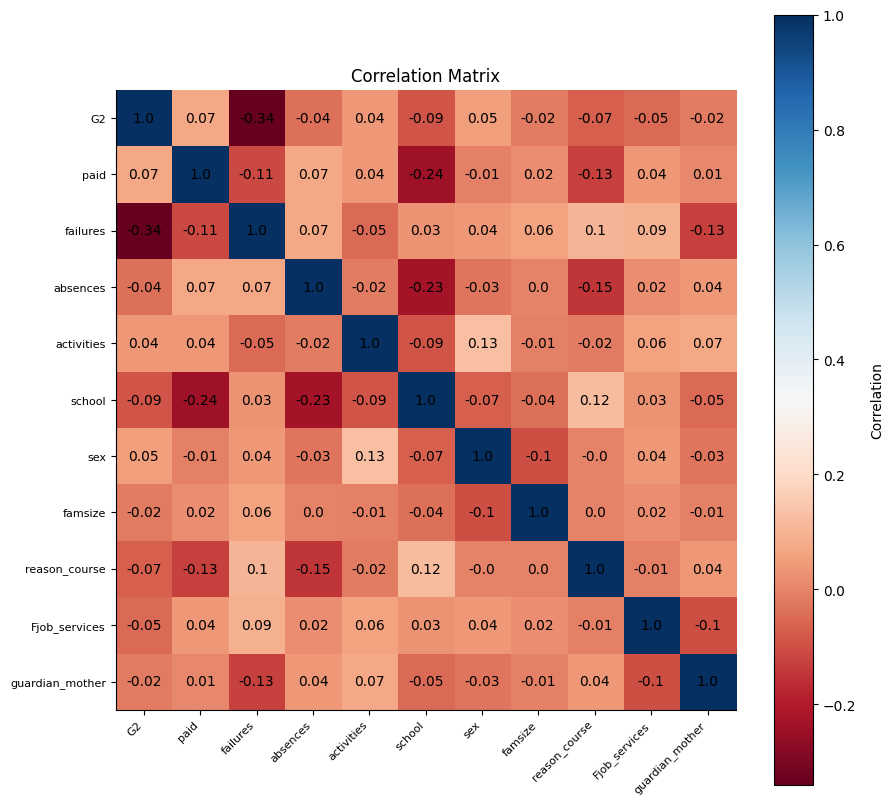

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = X_train_selected.corr().round(2)

heatmap = ax.imshow(corr_matrix, cmap='RdBu')


ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr_matrix.columns, fontsize=8)

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation', rotation=90, labelpad=10)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, str(corr_matrix.iloc[i, j]), ha='center', va='center', color='black')
ax.set_title('Correlation Matrix')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [32]:
X_tr_ = sm.add_constant(X_train_selected)

model = sm.OLS(y_train, X_tr_).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     233.8
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          1.31e-192
Time:                        16:20:53   Log-Likelihood:                -1023.3
No. Observations:                 529   AIC:                             2071.
Df Residuals:                     517   BIC:                             2122.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3369      0.443     